Mounted at /content/drive
NumPy sürümü : 1.25.2
TensorFlow sürümü: 2.18.0


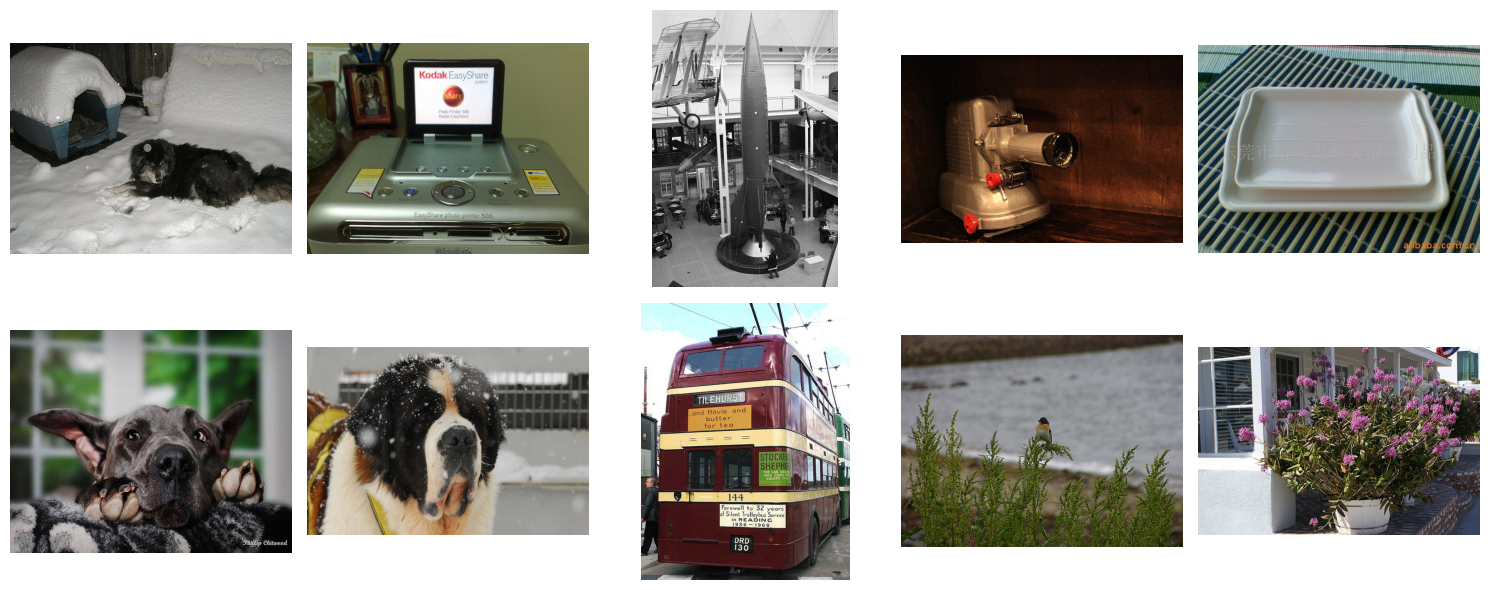

✅ EfficientNetB7 modeli yüklendi.
1/1 ━━━━━━━━━━━━━━━━━━━━ 15s 15s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


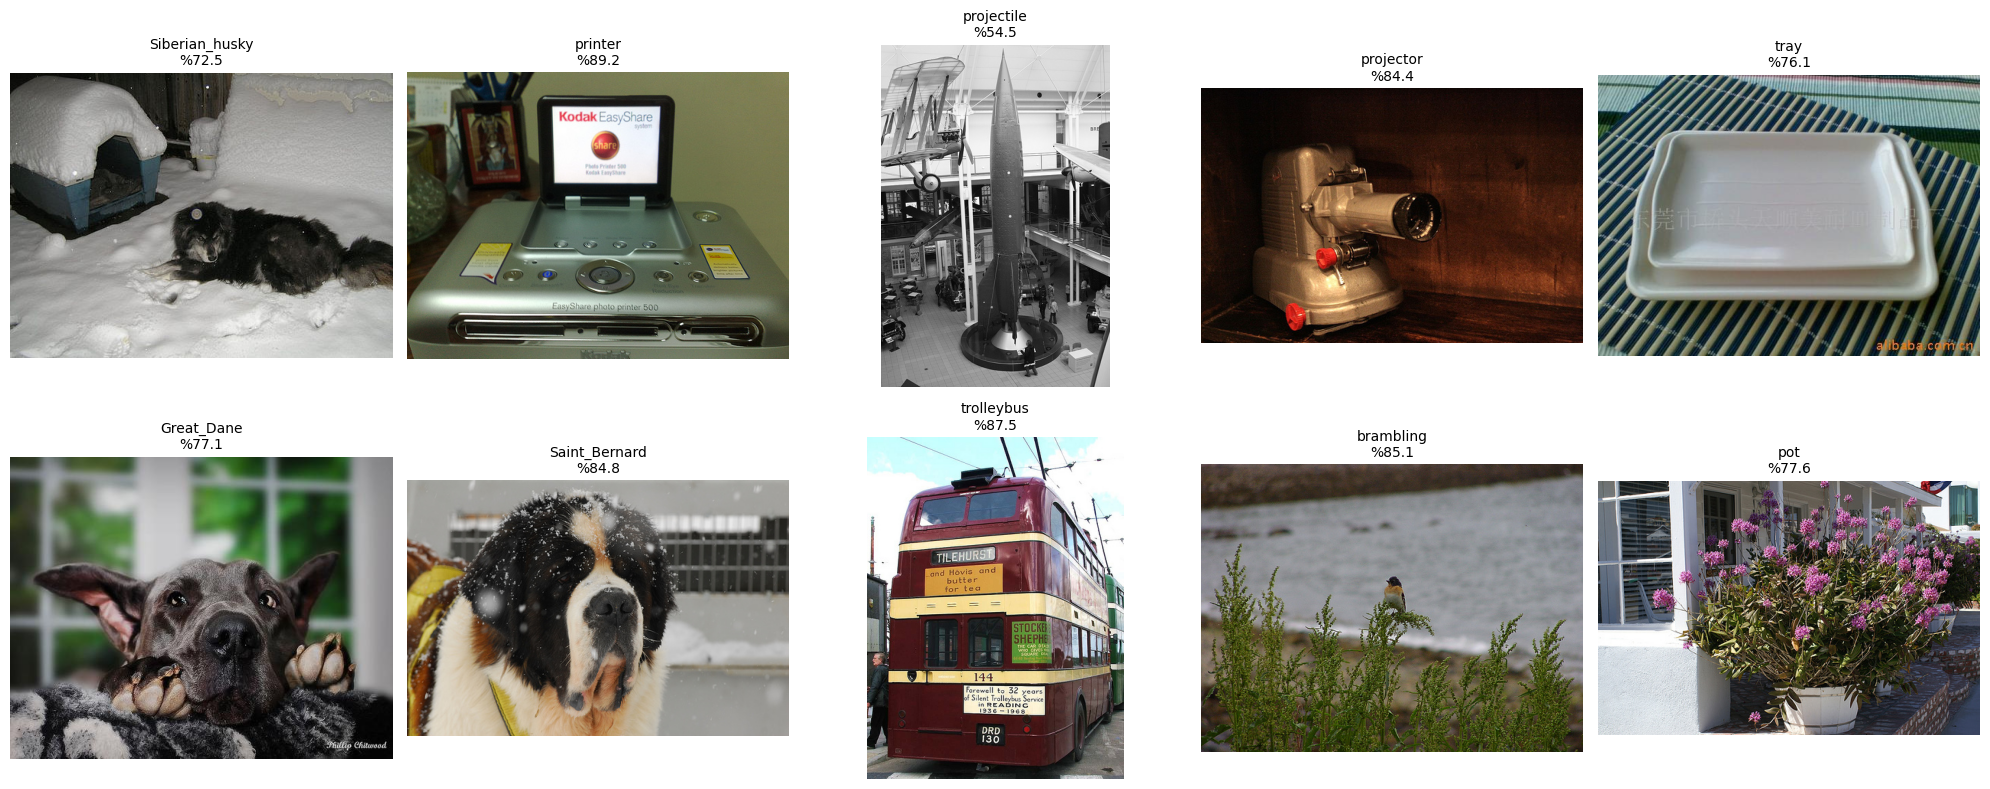

In [4]:
# 1) Drive’ı bağlayın
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


# 3) Import’lar ve versiyon kontrolü
import os, random
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
import tensorflow as tf

print("NumPy sürümü :", np.__version__)
print("TensorFlow sürümü:", tf.__version__)

from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import EfficientNetB7
from tensorflow.keras.applications.efficientnet import preprocess_input, decode_predictions

# 4) Yardımcı fonksiyonlar
def get_image_paths(root_dir, num_images=None):
    exts = ['*.jpg','*.jpeg','*.png']
    imgs = sum([glob(os.path.join(root_dir, '**', e), recursive=True) for e in exts], [])
    return random.sample(imgs, min(len(imgs), num_images)) if num_images else imgs

def display_images(img_list):
    plt.figure(figsize=(15, 6))
    for i, p in enumerate(img_list):
        arr = image.img_to_array(image.load_img(p), dtype=np.uint8)
        plt.subplot(2, 5, i+1)
        plt.imshow(arr)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

def preprocess_image(img_path, target_size=(600,600)):
    img = image.load_img(img_path, target_size=target_size)
    arr = image.img_to_array(img)[None, ...]
    return preprocess_input(arr)

def predict_image(model, img_array, top=1):
    preds = model.predict(img_array)
    # decode_predictions -> [(class_id, class_name, score), ...]
    decoded = decode_predictions(preds, top=top)[0]
    return [(class_name, score * 100) for (_, class_name, score) in decoded]

def visualize_predictions(model, img_paths, target_size=(600,600)):
    cols = 5
    rows = (len(img_paths) + cols - 1) // cols
    plt.figure(figsize=(cols*4, rows*4))
    for idx, p in enumerate(img_paths):
        ax = plt.subplot(rows, cols, idx+1)
        plt.imshow(image.load_img(p))
        plt.axis('off')
        preds = predict_image(model, preprocess_image(p, target_size), top=1)
        label, prob = preds[0]
        ax.set_title(f"{label}\n%{prob:.1f}", fontsize=10)
    plt.tight_layout()
    plt.show()

# 5) Ana akış
root_dir = '/content/drive/MyDrive/imagenet_samples'

# a) Örnek 10 resmi alıp göster
sample_images = get_image_paths(root_dir, num_images=10)
display_images(sample_images)

# b) Modeli yükle
model = EfficientNetB7(weights='imagenet')
print("✅ EfficientNetB7 modeli yüklendi.")

# c) Tahminleri görselleştir
visualize_predictions(model, sample_images, target_size=(600,600))